In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn import preprocessing
import pandas as pd


In [2]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = "https://drive.google.com/file/d/1oscfSHsx8RxfFlN3aDTQV6QPWSIZNT92/view?usp=sharing"
import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('bladder_cancer_dataset.csv')
df= pd.read_csv('bladder_cancer_dataset.csv')
print(df)

      A/G Ratio  Albumin    Alk  ALT (GPT)  AST (GOT)    BUN  Calcium  \
0           NaN     3.90   53.0       28.0       25.0   11.0      NaN   
1           NaN     3.20   87.0       14.0       26.0    9.8      NaN   
2           NaN     4.40   69.0       28.0       16.0   21.0     8.50   
3           NaN      NaN    NaN       18.0       24.0   11.0      NaN   
4           NaN     4.10  175.0       34.0       66.0  184.0     7.40   
...         ...      ...    ...        ...        ...    ...      ...   
1331        1.4     3.60    NaN      339.0      336.0    6.0      NaN   
1332        2.2     3.33   45.0       22.0       20.0   16.7      NaN   
1333        NaN      NaN    NaN       32.0       15.0   15.0     9.26   
1334        NaN      NaN    NaN       31.0       33.0    8.0      NaN   
1335        1.8     4.80   50.0       22.0       20.0   12.0      NaN   

      Chloride  Creatinine  Direct Bilirubin  ...   age  gender  Hyper1en1ion  \
0        107.0        0.60               0

In [4]:
df.shape



(1336, 41)

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
A/G Ratio                 590
Albumin                   300
Alk                       506
ALT (GPT)                  91
AST (GOT)                  62
BUN                        25
Calcium                   572
Chloride                  113
Creatinine                  7
Direct Bilirubin          405
Estimated GFR              12
Glucose AC                 52
Nitrite                    36
Urine occult Blood         36
pH                         36
Potassium                  48
Sodium                     50
Specific Gravity           36
Strip WBC                 215
Total Bilirubin           289
Total Cholesterol         260
Total Protein             382
Triglyceride              273
Urine epitheilum (UL)     575
Urine epithelium count     36
Uric acid                 212
Urine Bilirubin            36
Urine Glucose             221
Urine Ketone              222
Urine Protein              36
Urobilinogen               36
age                         3
gender                 

In [6]:
# Analyze categorical columns
print("\nCategorical Columns Analysis:")
for column in df.select_dtypes(include=['object']).columns:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())


Categorical Columns Analysis:

Value Counts for Disease:
Disease
UrinaryBladder    591
Prostate          201
Kidney            200
Uterus            200
Cystitis          144
Name: count, dtype: int64


In [7]:
import pandas as pd

# Load your dataset

# Drop columns with more than 200 missing values
df = df.loc[:, df.isnull().sum() <= 200]

# Print the resulting DataFrame to see which columns were retained
print(df)


      ALT (GPT)  AST (GOT)    BUN  Chloride  Creatinine  Estimated GFR  \
0          28.0       25.0   11.0     107.0        0.60           84.8   
1          14.0       26.0    9.8     101.8        0.60           59.6   
2          28.0       16.0   21.0     100.0        1.40           75.0   
3          18.0       24.0   11.0     103.9        0.96           78.6   
4          34.0       66.0  184.0     110.0        3.10           27.4   
...         ...        ...    ...       ...         ...            ...   
1331      339.0      336.0    6.0     106.0        0.50          138.8   
1332       22.0       20.0   16.7     104.0        1.19           46.4   
1333       32.0       15.0   15.0     105.0        0.70           85.9   
1334       31.0       33.0    8.0     111.0        0.60           96.9   
1335       22.0       20.0   12.0     106.0        0.70           98.3   

      Glucose AC  Nitrite  Urine occult Blood   pH  ...   age  gender  \
0          147.0      0.0             

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
ALT (GPT)                  91
AST (GOT)                  62
BUN                        25
Chloride                  113
Creatinine                  7
Estimated GFR              12
Glucose AC                 52
Nitrite                    36
Urine occult Blood         36
pH                         36
Potassium                  48
Sodium                     50
Specific Gravity           36
Urine epithelium count     36
Urine Bilirubin            36
Urine Protein              36
Urobilinogen               36
age                         3
gender                      3
Hyper1en1ion                0
Diabe1es                    0
Smoking                     0
Drinking                    0
Bee1leNu1                   0
FamilyHis1ory               0
Disease                     0
Patient Number              0
dtype: int64


In [ ]:
df.shape

(1336, 27)

In [9]:
import pandas as pd

# Load your dataset

# Fill missing values with the string 'NULL'
df = df.fillna('-1')

# Print the DataFrame to verify the changes
print(df)


     ALT (GPT) AST (GOT)    BUN Chloride Creatinine Estimated GFR Glucose AC  \
0         28.0      25.0   11.0    107.0        0.6          84.8      147.0   
1         14.0      26.0    9.8    101.8        0.6          59.6      126.0   
2         28.0      16.0   21.0    100.0        1.4          75.0      182.0   
3         18.0      24.0   11.0    103.9       0.96          78.6      115.0   
4         34.0      66.0  184.0    110.0        3.1          27.4      145.0   
...        ...       ...    ...      ...        ...           ...        ...   
1331     339.0     336.0    6.0    106.0        0.5         138.8       77.0   
1332      22.0      20.0   16.7    104.0       1.19          46.4      103.0   
1333      32.0      15.0   15.0    105.0        0.7          85.9       94.0   
1334      31.0      33.0    8.0    111.0        0.6          96.9      127.0   
1335      22.0      20.0   12.0    106.0        0.7          98.3       95.0   

     Nitrite Urine occult Blood   pH  .

In [10]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
ALT (GPT)                 0
AST (GOT)                 0
BUN                       0
Chloride                  0
Creatinine                0
Estimated GFR             0
Glucose AC                0
Nitrite                   0
Urine occult Blood        0
pH                        0
Potassium                 0
Sodium                    0
Specific Gravity          0
Urine epithelium count    0
Urine Bilirubin           0
Urine Protein             0
Urobilinogen              0
age                       0
gender                    0
Hyper1en1ion              0
Diabe1es                  0
Smoking                   0
Drinking                  0
Bee1leNu1                 0
FamilyHis1ory             0
Disease                   0
Patient Number            0
dtype: int64


In [11]:
# Create a mapping for each disease category
disease_mapping = {
    'UrinaryBladder': 1,
    'Prostate': 2,
    'Kidney': 3,
    'Uterus': 4,
    'Cystitis': 5
}

# Apply the mapping to the 'Disease' column
df['Disease'] = df['Disease'].map(disease_mapping)

# Print the DataFrame to verify the conversion
print(df['Disease'].head())

0    5
1    5
2    5
3    5
4    5
Name: Disease, dtype: int64


In [13]:
# Convert all object data type columns in df to float
for col in df.select_dtypes(include='object').columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(f"Column '{col}' cannot be converted to float and was skipped.")

# Verify the conversion
print(df.dtypes)


ALT (GPT)                 float64
AST (GOT)                 float64
BUN                       float64
Chloride                  float64
Creatinine                float64
Estimated GFR             float64
Glucose AC                float64
Nitrite                   float64
Urine occult Blood        float64
pH                        float64
Potassium                 float64
Sodium                    float64
Specific Gravity          float64
Urine epithelium count    float64
Urine Bilirubin           float64
Urine Protein             float64
Urobilinogen              float64
age                       float64
gender                    float64
Hyper1en1ion                int64
Diabe1es                    int64
Smoking                     int64
Drinking                    int64
Bee1leNu1                   int64
FamilyHis1ory               int64
Disease                     int64
Patient Number              int64
dtype: object


In [14]:
df.dtypes

,0
ALT (GPT),float64
AST (GOT),float64
BUN,float64
Chloride,float64
Creatinine,float64
Estimated GFR,float64
Glucose AC,float64
Nitrite,float64
Urine occult Blood,float64
pH,float64


# RANDOM FOREST

Accuracy: 0.5335820895522388
Confusion Matrix:
 [[93  6  4 13  1]
 [27 15  1  0  0]
 [28  4  4  5  0]
 [13  0  0 28  0]
 [16  3  0  4  3]]
Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.79      0.63       117
           2       0.54      0.35      0.42        43
           3       0.44      0.10      0.16        41
           4       0.56      0.68      0.62        41
           5       0.75      0.12      0.20        26

    accuracy                           0.53       268
   macro avg       0.56      0.41      0.41       268
weighted avg       0.54      0.53      0.48       268



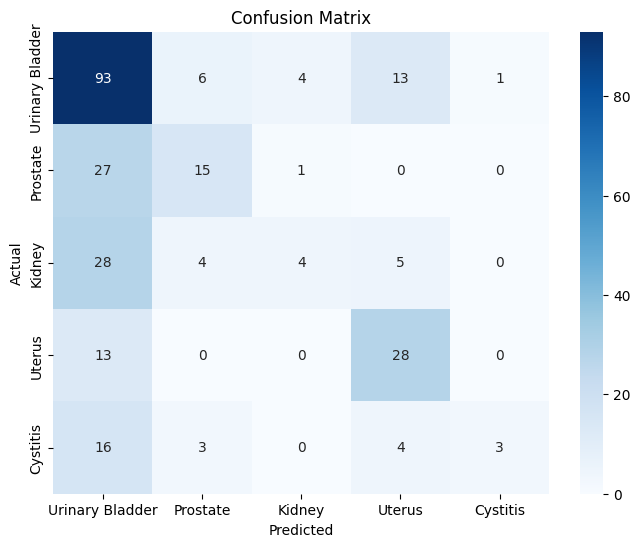

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming df_filtered is already defined with necessary preprocessing
# Ensure df_filtered contains no missing values and all columns are numeric
df_filtered = df.dropna()

# Select features (X) and target (y)
X = df_filtered.drop(['Disease'], axis=1)
y = df_filtered['Disease']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'], yticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# DECISION TREE

Accuracy: 0.4626865671641791
Confusion Matrix:
 [[59 13 20  5 20]
 [12 20  6  0  5]
 [17  5 11  6  2]
 [ 6  0  4 27  4]
 [12  3  1  3  7]]
Classification Report:
               precision    recall  f1-score   support

           1       0.56      0.50      0.53       117
           2       0.49      0.47      0.48        43
           3       0.26      0.27      0.27        41
           4       0.66      0.66      0.66        41
           5       0.18      0.27      0.22        26

    accuracy                           0.46       268
   macro avg       0.43      0.43      0.43       268
weighted avg       0.48      0.46      0.47       268



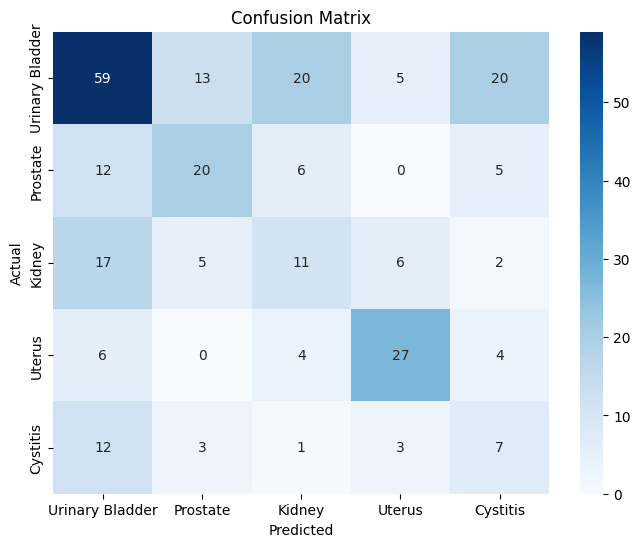

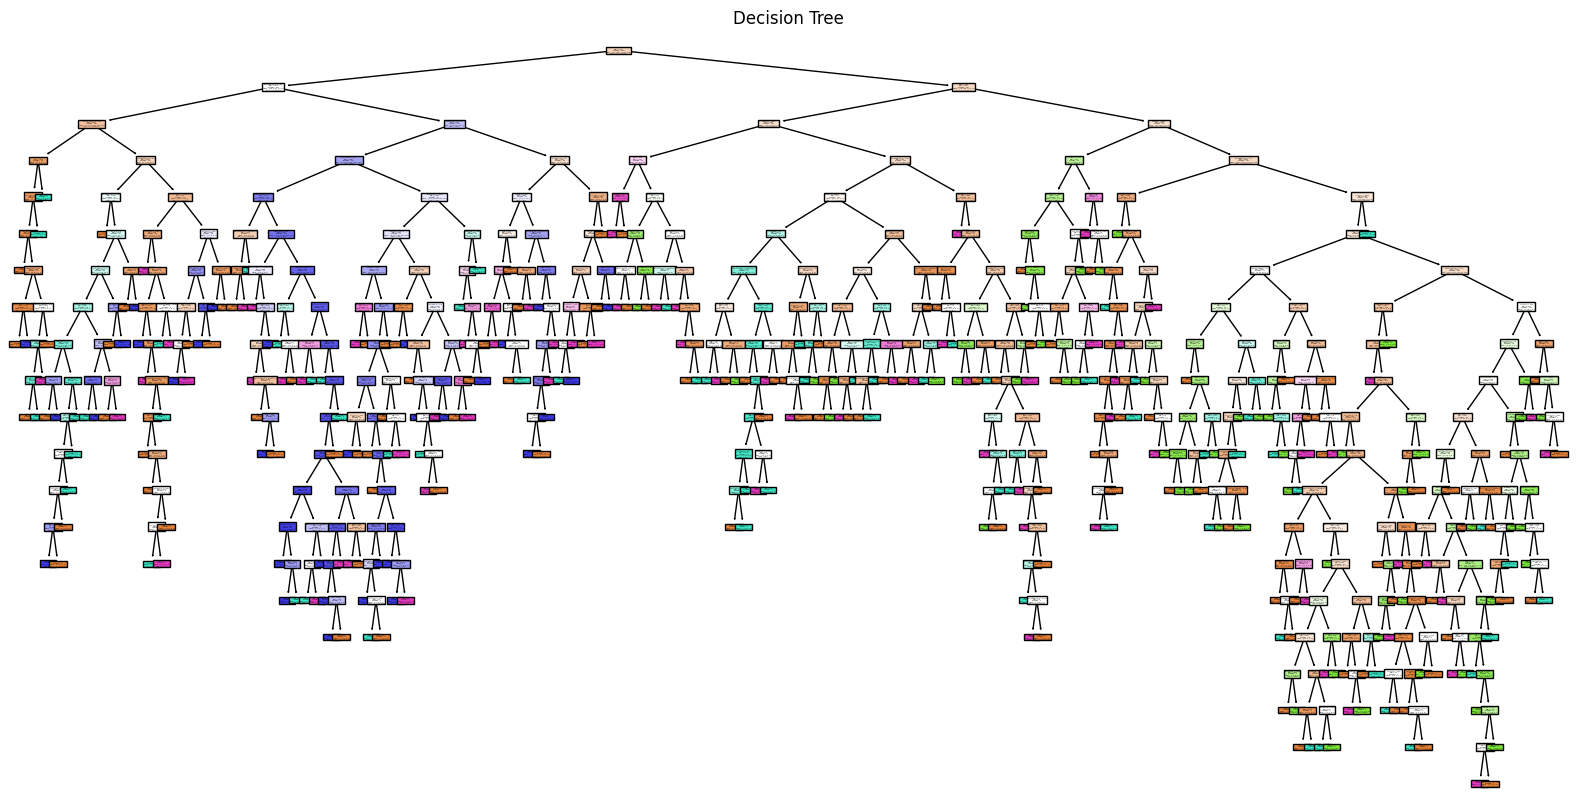

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Assuming df_filtered is already defined with necessary preprocessing
# Ensure df_filtered contains no missing values and all columns are numeric
df_filtered = df_filtered.dropna()

# Select features (X) and target (y)
X = df_filtered.drop(['Disease'], axis=1)
y = df_filtered['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'], yticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the decision tree (optional)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'], filled=True)
plt.title('Decision Tree')
plt.show()


# Naive Bayes classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.43656716417910446
Confusion Matrix:
 [[117   0   0   0   0]
 [ 43   0   0   0   0]
 [ 41   0   0   0   0]
 [ 41   0   0   0   0]
 [ 26   0   0   0   0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.44      1.00      0.61       117
           2       0.00      0.00      0.00        43
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        26

    accuracy                           0.44       268
   macro avg       0.09      0.20      0.12       268
weighted avg       0.19      0.44      0.27       268



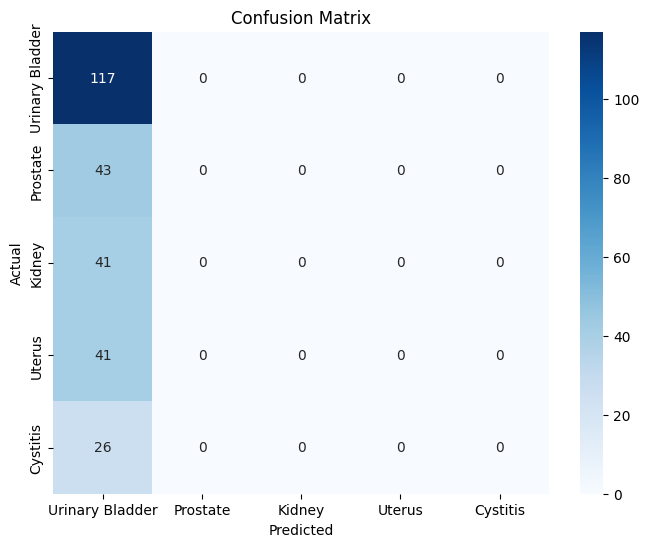

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Assuming df_filtered is already defined with necessary preprocessing
# Ensure df_filtered contains no missing values and all columns are numeric
df_filtered = df_filtered.dropna()

# Select features (X) and target (y)
X = df_filtered.drop(['Disease'], axis=1)
y = df_filtered['Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'], yticklabels=['Urinary Bladder', 'Prostate','Kidney','Uterus','Cystitis'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
